In [193]:
import pandas as pd
import pingouin as pg
import numpy as np
import statistics
import numpy as np
# Power analysis
from statsmodels.stats.power import TTestIndPower
# Visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import pingouin as pg
import scipy.stats as scs
from scipy.stats import shapiro
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [241]:
import numpy as np
import pandas as pd

# Создаем датасет для группы A
n = 5000 # количество студентов
math_mean_a = 3.8 # среднее среднего балла по математике в группе A
math_std_a = 0.3 # стандартное отклонение среднего балла по математике в группе A
physics_mean_a = 4.0 # среднее среднего балла по физике в группе A
physics_std_a = 0.2 # стандартное отклонение среднего балла по физике в группе A
russian_mean_a = 4.2 # среднее среднего балла по русскому языку в группе A
russian_std_a = 0.2 # стандартное отклонение среднего балла по русскому языку в группе A
attendance_mean_a = 10.0 # среднее количество пропущенных занятий в группе A
attendance_skew_a = 2.0 # коэффициент скошенности распределения количества пропущенных занятий в группе A
age_groups_a = ['младшие']*int(n*0.33) + ['средние']*int(n*0.33) + ['старшие']*int(n*0.34) # группы возраста в группе A
gender_a = ['мужской']*int(n*0.5) + ['женский']*int(n*0.5) # пол в группе A
exam_results_a = [1]*int(n*0.75) + [0]*int(n*0.25) # результаты экзамена в группе A

# Создаем признаки для группы A
def generate_dataset(group, n, math_mean_a, math_std_a, physics_mean_a, physics_std_a, russian_mean_a, russian_std_a, attendance_mean_a, attendance_skew_a, age_groups_a, gender_a, exam_results_a):
    name_group = [group for i in range(n)]
    math_scores_a = np.random.normal(loc=math_mean_a, scale=math_std_a, size=n).round(1)
    physics_scores_a = np.random.normal(loc=physics_mean_a, scale=physics_std_a, size=n).round(1)
    russian_scores_a = np.random.normal(loc=russian_mean_a, scale=russian_std_a, size=n).round(1)
    attendance_a = np.random.negative_binomial(n=attendance_skew_a, p=attendance_skew_a/(attendance_skew_a + attendance_mean_a), size=n)
    age_a = np.random.choice(age_groups_a, size=n)
    gender_a = np.random.choice(gender_a, size=n)
    exam_results_a = np.random.choice(exam_results_a, size=n)
    df = pd.DataFrame({'group':name_group, 'math_scores':math_scores_a, 'physics_scores':physics_scores_a, 'russian_scores':russian_scores_a,
                      'attendance':attendance_a, 'age':age_a, 'gender':gender_a, 'exam_results':exam_results_a})
    return df



In [242]:
df_a = generate_dataset('A', n, math_mean_a, math_std_a, physics_mean_a, physics_std_a, russian_mean_a, russian_std_a, attendance_mean_a, attendance_skew_a, age_groups_a, gender_a, exam_results_a)

In [181]:
df_a2 = generate_dataset('A2', n, math_mean_a, math_std_a, physics_mean_a, physics_std_a, russian_mean_a, russian_std_a, attendance_mean_a, attendance_skew_a, age_groups_a, gender_a, exam_results_a)

In [182]:
df = pd.concat([df_a, df_a2])

In [183]:
df.groupby('group')[['math_scores', 'physics_scores', 'russian_scores',
       'attendance', 'exam_results']].mean()

,math_scores,physics_scores,russian_scores,attendance,exam_results
group,,,,,
A1,3.798435,3.99928,4.199670,9.98700,0.75340
A2,3.800765,3.99975,4.200795,9.95435,0.75285


In [248]:
# Создаем датасет для группы A
n = 5000 # количество студентов
math_mean_b = 4 # среднее среднего балла по математике в группе A
math_std_b = 0.5 # стандартное отклонение среднего балла по математике в группе A
physics_mean_b = 4.2 # среднее среднего балла по физике в группе A
physics_std_b = 0.2 # стандартное отклонение среднего балла по физике в группе A
russian_mean_b = 3.9 # среднее среднего балла по русскому языку в группе A
russian_std_b = 0.3 # стандартное отклонение среднего балла по русскому языку в группе A
attendance_mean_b = 7.0 # среднее количество пропущенных занятий в группе A
attendance_skew_b = 1.0 # коэффициент скошенности распределения количества пропущенных занятий в группе A
age_groups_b = ['младшие']*int(n*0.333) + ['средние']*int(n*0.333) + ['старшие']*int(n*0.334) # группы возраста в группе A
gender_b = ['мужской']*int(n*0.5) + ['женский']*int(n*0.5) # пол в группе A
exam_results_b = [1]*int(n*0.8) + [0]*int(n*0.2) # результаты экзамена в группе A

In [249]:
df_b = generate_dataset('B', n, math_mean_b, math_std_b, physics_mean_b, physics_std_b, russian_mean_b, russian_std_b, attendance_mean_b, attendance_skew_b, age_groups_b, gender_b, exam_results_b)

array([[<AxesSubplot: title={'center': 'math_scores'}>,
        <AxesSubplot: title={'center': 'physics_scores'}>],
       [<AxesSubplot: title={'center': 'russian_scores'}>,
        <AxesSubplot: title={'center': 'attendance'}>],
       [<AxesSubplot: title={'center': 'exam_results'}>, <AxesSubplot: >]],
      dtype=object)

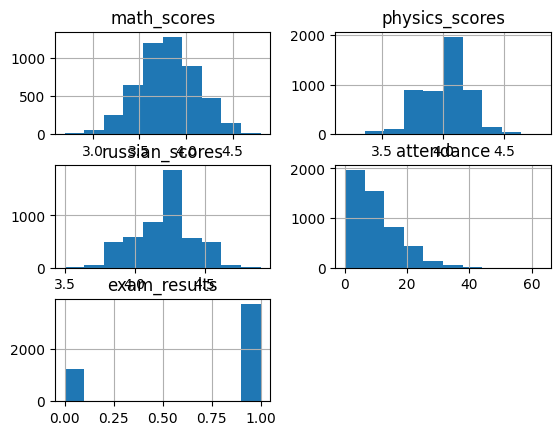

In [245]:
df_a.hist()

array([[<AxesSubplot: title={'center': 'math_scores'}>,
        <AxesSubplot: title={'center': 'physics_scores'}>],
       [<AxesSubplot: title={'center': 'russian_scores'}>,
        <AxesSubplot: title={'center': 'attendance'}>]], dtype=object)

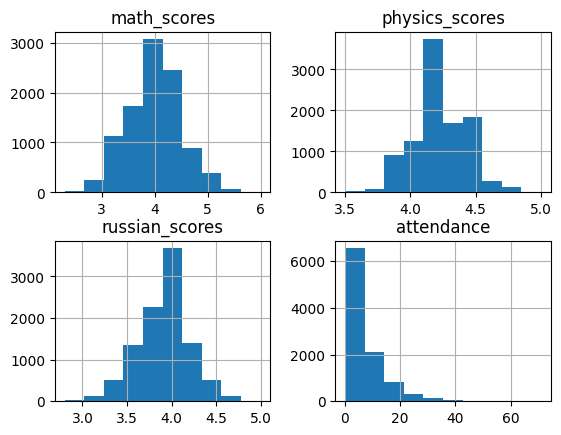

In [135]:
df_b.hist()

In [250]:
df = pd.concat([df_a, df_b])

In [247]:
df

,group,math_scores,physics_scores,russian_scores,attendance,age,gender,exam_results
0,A,2.9,4.0,4.1,7,младшие,мужской,1
1,A,3.4,3.9,4.5,12,старшие,мужской,1
2,A,3.8,4.1,4.4,7,средние,женский,0
3,A,3.9,3.9,4.2,0,средние,женский,1
4,A,3.5,4.1,3.8,10,младшие,мужской,1
...,...,...,...,...,...,...,...,...
4995,B,3.2,4.1,4.5,0,младшие,мужской,сдал
4996,B,4.3,4.3,3.9,5,старшие,мужской,сдал
4997,B,3.9,4.3,4.4,4,старшие,мужской,сдал
4998,B,3.9,4.0,4.2,2,младшие,мужской,не сдал


In [251]:
df['math_scores'] = df['math_scores'].apply(lambda x: x if x <=5 and x>=1 else 5 if x > 5 else 1)
df['physics_scores'] = df['physics_scores'].apply(lambda x: x if x <=5 and x>=1 else 5 if x > 5 else 1)
df['russian_scores'] = df['russian_scores'].apply(lambda x: x if x <=5 and x>=1 else 5 if x > 5 else 1)

In [252]:
(df.pivot_table(index='group', columns='age', values='attendance', aggfunc='count').T/df.pivot_table(index='group', columns='age', values='attendance', aggfunc='count').T.sum()).T

age,младшие,средние,старшие
group,,,
A,0.3300,0.3194,0.3506
B,0.3382,0.3380,0.3238


In [253]:
df.groupby('group')[['math_scores', 'physics_scores', 'russian_scores',
       'attendance', 'exam_results']].mean()

,math_scores,physics_scores,russian_scores,attendance,exam_results
group,,,,,
A,3.80106,4.00294,4.19942,10.0204,0.7492
B,4.00328,4.19560,3.89964,7.1022,0.8074


In [53]:
df_a

,group,math_scores,physics_scores,russian_scores,attendance,age,gender,exam_results
0,A1,5.0,4.3,4.4,41,младшие,женский,1
1,A1,3.8,4.1,4.1,12,младшие,женский,0
2,A1,4.3,4.2,4.4,10,младшие,мужской,1
3,A1,3.8,3.7,4.1,15,средние,мужской,1
4,A1,3.9,3.9,4.7,28,средние,женский,1
...,...,...,...,...,...,...,...,...
1995,A1,4.0,3.8,4.3,8,средние,женский,1
1996,A1,4.3,4.4,3.8,19,старшие,женский,1
1997,A1,3.9,4.3,4.3,22,старшие,мужской,1
1998,A1,3.0,4.2,4.4,10,средние,женский,1


In [254]:
df.to_csv('student_dataset_for_ab_test.csv', index=False)

In [255]:
df.empty

False

In [107]:
df.math_scores.max()

5.9

In [256]:
def calculate_sample_size(delta, sigma, alpha=0.05, beta=0.8,  ratio=1):
    # alpha - уровень значимости
    # beta - мощность теста
    # delta - ожидаемый эффект
    # sigma - стандартное отклонение
    # ratio - отношение размеров выборок
    if ratio == 0:
        raise ValueError("Ratio should not be zero")
    # Значение Z для уровня значимости и мощности теста
    Z_alpha = abs(norm.ppf(1-alpha/2))
    Z_beta = abs(norm.ppf(beta))

    # Расчет размера выборки для большей группы
    n1 = ((Z_alpha + Z_beta)**2 * (sigma**2) * (1 + 1/ratio)) / delta**2

    # Расчет размера выборки для меньшей группы
    n2 = n1 / ratio

    # Округление до ближайшего целого числа и возвращение результата
    return math.ceil(n1), math.ceil(n2)

In [257]:
(0.259*(1-0.259))**(1/2)

0.4380856080722123

In [263]:
calculate_sample_size(0.036, 0.4380856080722123
, alpha=0.05, beta=0.8,  ratio=0.25)

(5812, 23247)

In [195]:
df_a['math_scores'].std()

0.3027517691223047

In [212]:
df_a['math_scores'].var()**(1/2)

0.3027517691223047

In [213]:
df_a['exam_results'].var()**(1/2)

0.4310426079710616

In [214]:
(df_a['exam_results'].mean()*(1 - df_a['exam_results'].mean()))**(1/2)

0.4310318317711582

In [220]:
calculate_sample_size(0.02, df_a['math_scores'].std(), alpha=0.05, beta=0.8,  ratio=1)

(3598, 3598)

In [188]:
df_a

,group,math_scores,physics_scores,russian_scores,attendance,age,gender,exam_results
0,A1,4.1,3.9,4.4,24,старшие,женский,1
1,A1,4.3,4.0,4.4,15,младшие,женский,1
2,A1,3.7,4.4,4.2,6,средние,женский,0
3,A1,3.7,3.8,4.0,5,младшие,женский,1
4,A1,3.5,4.0,4.3,13,младшие,мужской,1
...,...,...,...,...,...,...,...,...
19995,A1,3.2,4.0,4.1,1,средние,мужской,1
19996,A1,4.0,4.2,4.0,8,средние,мужской,1
19997,A1,3.2,4.1,4.2,15,средние,женский,1
19998,A1,3.7,3.8,4.0,10,старшие,мужской,1


In [58]:
df.groupby('group')[['math_scores', 'physics_scores', 'russian_scores']].mean()

,math_scores,physics_scores,russian_scores
group,,,
A1,3.76875,3.99645,4.19955
A2,3.79555,4.00425,4.19840


In [32]:
'math_scores' in df.columns

True

In [59]:
a = set([1, 2, 3, 3, 4])

In [61]:
list(a)

[1, 2, 3, 4]

In [93]:
round(df.groupby('group', as_index=0)[['math_scores', 'physics_scores', 'exam_results']].mean(), 3)

,group,math_scores,physics_scores,exam_results
0,A1,3.781,3.990,0.727
1,A2,3.777,3.995,0.751


In [39]:
url = 'https://drive.google.com/file/d/1222Vj2tC0G3BMFBPkcQ6wIqJYe-l45Xz/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
DATAFRAME_M = pd.read_csv(url)

In [47]:
DATAFRAME_M

,group,math_scores,physics_scores,russian_scores,attendance,age,gender,exam_results
0,A,2.6,4.2,3.8,27,старшие,женский,не сдал
1,A,3.7,4.0,4.3,12,старшие,мужской,сдал
2,A,4.2,3.5,4.2,2,старшие,женский,не сдал
3,A,4.1,3.4,4.5,1,средние,мужской,сдал
4,A,4.1,4.1,3.8,6,старшие,женский,сдал
...,...,...,...,...,...,...,...,...
9995,A,4.3,4.2,3.3,3,средние,мужской,сдал
9996,A,3.2,4.3,3.8,2,старшие,женский,не сдал
9997,A,2.9,4.0,3.7,3,младшие,женский,сдал
9998,A,3.6,4.0,4.3,1,старшие,мужской,сдал


In [56]:
DATAFRAME_M['group'].nunique()

1

In [44]:
VALUES_COLUMN_M = 'math_scores'

In [45]:
VALUES_COLUMN_M not in DATAFRAME_M.columns

False

In [3]:
def calculate_sample_size(delta, sigma, alpha=0.05, beta=0.8,  ratio=1):
    # alpha - уровень значимости
    # beta - мощность теста
    # delta - ожидаемый эффект
    # sigma - стандартное отклонение
    # ratio - отношение размеров выборок
    if ratio == 0:
        raise ValueError("Ratio should not be zero")
    # Значение Z для уровня значимости и мощности теста
    Z_alpha = abs(norm.ppf(1-alpha/2))
    Z_beta = abs(norm.ppf(beta))

    # Расчет размера выборки для большей группы
    n1 = ((Z_alpha + Z_beta)**2 * (sigma**2) * (1 + 1/ratio)) / delta**2

    # Расчет размера выборки для меньшей группы
    n2 = n1 / ratio

    # Округление до ближайшего целого числа и возвращение результата
    return math.ceil(n1), math.ceil(n2)

In [ ]:
calculate_sample_size()

In [29]:
# Initiate the power analysis
power_analysis = TTestIndPower()
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = 0.2, alpha = 0.05, power = 0.8,ratio=3, alternative = 'two-sided')

In [11]:
df

,group,values
0,A,1
1,B,1
2,A,1
3,B,1
4,A,1
...,...,...
95,B,1
96,A,1
97,B,1
98,A,1


In [7]:
GROUP_COLUMN_M = 'group'
DESC_METRIC_VALUE_COLUMNS = ['values']

In [14]:
test_dict = {value_columns:df[value_columns][1]/df[value_columns][0]-1 for value_columns in DESC_METRIC_VALUE_COLUMNS}

In [15]:
test_dict[GROUP_COLUMN_M] = 'diff'

In [16]:
test_dict

{'values': 0.0, 'group': 'diff'}

In [17]:
df.append(pd.DataFrame(test_dict))

ValueError: If using all scalar values, you must pass an index

In [25]:
393.4056989990341 *2

786.8113979980682

In [28]:
294.9738826232501 + 294.9738826232501*2

884.9216478697504

In [31]:
262.109734406937 + 262.109734406937*3

1048.438937627748

In [4]:
[i for i in range(4)]

[0, 1, 2, 3]

In [3]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':[1 if i % 4 == 0 else 0 for i in range(100)]})

In [6]:
for i in df['group'].unique():
    print(i)

A
B


In [10]:
a = True
not a

False

In [35]:
a = df['values'].std()

In [36]:
a

0.4351941398892446

In [5]:
df

,group,values
0,A,"1,0"
1,B,"0,0"
2,A,"0,0"
3,B,"0,0"
4,A,"1,0"
...,...,...
95,B,"0,0"
96,A,"1,0"
97,B,"0,0"
98,A,"0,0"


In [4]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':['1,0' if i % 4 == 0 else '0,0' for i in range(100)]})

In [10]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':[1 for i in range(100)]})

In [132]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'values':[i for i in range(100)]})

In [119]:
df = pd.DataFrame({'group':[ 'A' if i % 2 == 0 else 'B' for i in range(100)], 'group_w':[ 'A' if i % 3 == 0 else 'B' if i % 3 == 1 else 'C' for i in range(100)], 'values':[i for i in range(100)], 'values_w':[np.nan if i % 10 == 0 else i for i in range(100)], 'values_w_2':['digit' if i % 10 == 0 else i for i in range(100)], 'values_w_3':['digit' if i % 10 == 0 else i for i in range(100)]})

In [120]:
df

,group,group_w,values,values_w,values_w_2,values_w_3
0,A,A,0,NaN,digit,digit
1,B,B,1,1.0,1,1
2,A,C,2,2.0,2,2
3,B,A,3,3.0,3,3
4,A,B,4,4.0,4,4
...,...,...,...,...,...,...
95,B,C,95,95.0,95,95
96,A,A,96,96.0,96,96
97,B,B,97,97.0,97,97
98,A,C,98,98.0,98,98


In [121]:
pct2 = (df.groupby(['group','group_w']).size() / df.groupby(['group']).size()).reset_index().rename({0:'percent'}, axis=1)

In [141]:
import seaborn as sns

sns.set(rc={'figure.figsize':(4,3)})

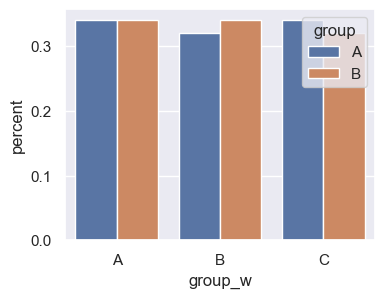

In [157]:
with pd.ExcelWriter('/Users/vklochkov/Downloads/test.xlsx', engine='xlsxwriter') as writer:
        image = sns.barplot(x='group_w', hue='group', y='percent', data=pct2).get_figure()
        image.savefig('/Users/vklochkov/Downloads/test.png')
        pd.DataFrame().to_excel(writer, sheet_name='test', startrow=1, startcol=1, index=False)
        worksheet = writer.sheets['test']
        # Insert an image.
        worksheet.insert_image('A1', '/Users/vklochkov/Downloads/test.png')
        worksheet.insert_image('A20', '/Users/vklochkov/Downloads/test.png')
        worksheet.insert_image('H1', '/Users/vklochkov/Downloads/test.png')

In [160]:
True not in [False, False, False]

True

In [164]:
result = [i for i in range(10)]

In [165]:
df_p_val = pd.DataFrame({'name_column_value':result})

array([[<AxesSubplot: title={'center': 'name_column_value'}>]],
      dtype=object)

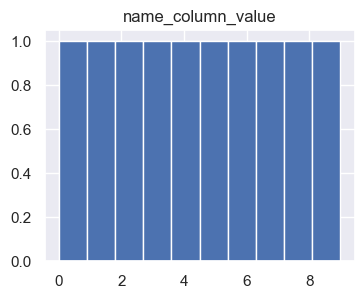

In [167]:
df_p_val.hist()

<AxesSubplot: xlabel='group_w', ylabel='percent'>

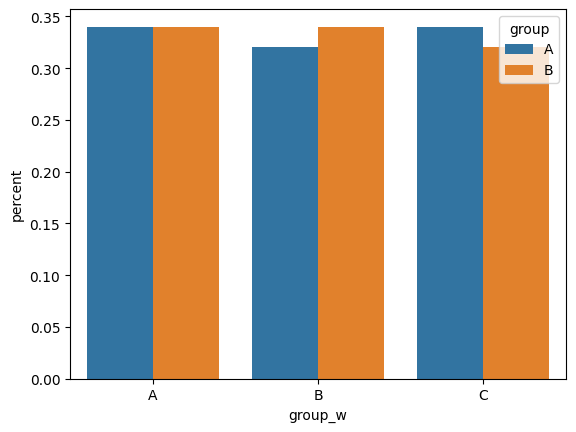

In [124]:
sns.barplot(x='group_w', hue='group', y='percent', data=pct2).get_figure()


In [170]:
pct2

,group,group_w,percent
0,A,A,0.34
1,A,B,0.32
2,A,C,0.34
3,B,A,0.34
4,B,B,0.34
5,B,C,0.32


In [169]:
pct2.pivot_table(index='group', columns='group_w', values='group_w', aggfunc='count')

group_w,A,B,C
group,,,
A,1,1,1
B,1,1,1


In [20]:
def missing_values(df: pd.DataFrame, column_group: str, column_value: str, str_val='del'):
    message = ''
    if str_val == 'Удалить':
        df[column_value] = df[column_value].dropna()
        message += "Пропущенные значения были удалены."
    elif str_val == 'Минимальное':
        df[column_value].fillna(df[column_value].min(), inplace=True)
        message += "Пропущенные значения были заменены на минимальное."
    elif str_val == 'Максимальное':
        df[column_value].fillna(df[column_value].max(), inplace=True)
        message += "Пропущенные значения были заменены на максимальное."
    elif str_val == 'Среднее':
        df[column_value].fillna(df[column_value].mean(), inplace=True)
        message += "Пропущенные значения были заменены на среднее."
    elif str_val == 'Медиану':
        df[column_value].fillna(df[column_value].median(), inplace=True)
        message += "Пропущенные значения были заменены на медиану."
    elif str_val.isdigit():
        df[column_value].fillna(float(str_val), inplace=True)
        message += f"Пропущенные значения были заменены на {str_val}."
    return df, message

In [24]:
dec = '0'

In [26]:
df_t, m = missing_values(df, 'group', 'values_w', str_val = dec)

In [151]:
df[df['group']=='A'].shape[0]**(1/3)

3.6840314986403864

In [152]:
2*(df[df['group']=='A']['values'].quantile(0.75) - df[df['group']=='A']['values'].quantile(0.25))

98.0

In [173]:
df

,group,group_w,values,values_w,values_w_2,values_w_3
0,A,A,0,NaN,digit,digit
1,B,B,1,1.0,1,1
2,A,C,2,2.0,2,2
3,B,A,3,3.0,3,3
4,A,B,4,4.0,4,4
...,...,...,...,...,...,...
95,B,C,95,95.0,95,95
96,A,A,96,96.0,96,96
97,B,B,97,97.0,97,97
98,A,C,98,98.0,98,98


In [174]:
df.pivot_table(index='group', columns='group_w', values='group', aggfunc='count')

ValueError: Grouper for 'group' not 1-dimensional

In [40]:
dict_test ={'a':[1]}

In [41]:
dict_test['b'] = 3

In [43]:
pd.DataFrame(dict_test)

,a,b
0,1,3


In [33]:
df.dtypes

group          object
group_w        object
values          int64
values_w      float64
values_w_2     object
values_w_3     object
dtype: object

In [74]:
import seaborn as sns

In [92]:
cv1 = np.random.normal(50, 10, 1000)
cv2 = np.random.normal(55, 9, 1000)

source_a = {"group": ["a"]*1000, "values": cv1}
source_b = {"group": ["b"]*1000, "values": cv2}

df_1=pd.DataFrame(source_a)
df_2=pd.DataFrame(source_b)
df = pd.concat([df_1, df_2])

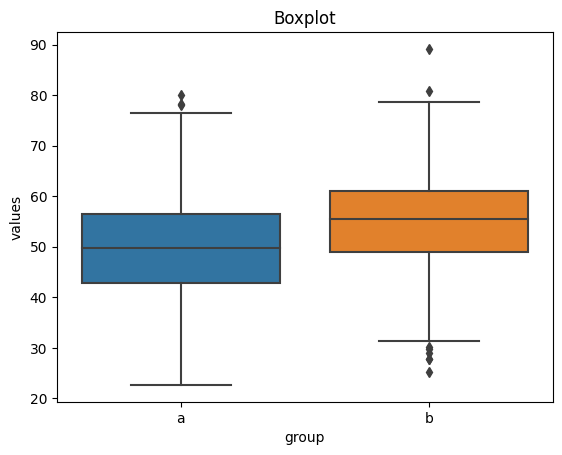

In [116]:
sns.boxplot(data=df, x='group', y='values')
plt.title("Boxplot");

In [117]:
plt.show()

In [154]:
np.max([1, 2])

2

In [94]:
2*(df[df['group']=='a']['values'].quantile(0.75) - df[df['group']=='a']['values'].quantile(0.25))/df[df['group']=='a'].shape[0]**(1/3)

2.714824727774101

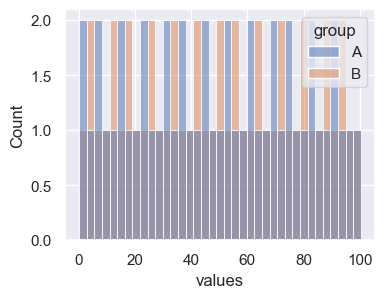

In [156]:
image = sns.histplot(data = df, x='values', hue='group', binwidth=2.714824727774101).get_figure()

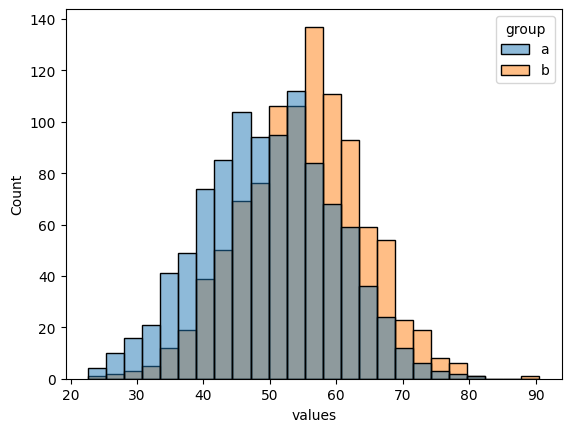

In [103]:
image

In [47]:
df['values_w'] = df['values_w'].fillna(df['values_w'].min())

In [49]:
final_dataset_cont = df.groupby('group', as_index=0)['values_w'].mean()

In [63]:
final_dataset_cont

,group,values_w
0,A,40.2
1,B,50.0


In [59]:
[i for i in range(1)]

[0]

In [60]:
dict_row = {GROUP_COLUMN_M:['diff', 'p_val']}


In [61]:
dict_row['values_w'] = [round(final_dataset_cont['values_w'][1]/final_dataset_cont['values_w'][0]-1, 3), round(1, 3)]

In [62]:
dict_row

{'group': ['diff', 'p_val'], 'values_w': [0.244, 1]}

In [69]:
final_dataset_cont.append(pd.DataFrame(dict_row))

TypeError: append() got an unexpected keyword argument 'inplace'

In [70]:
a = [0, 2]

In [71]:
a.append(4)

In [72]:
a

[0, 2, 4]

In [68]:
final_dataset_cont

,group,values_w
0,A,40.2
1,B,50.0


In [138]:
df.to_csv('test_df_5.csv', index=False)

In [98]:
df = pd.read_csv('test_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test_df.csv'

In [141]:
df['values_w'].isna().sum()

10

In [142]:
a = '0'
a.isdigit()

True

In [6]:
df

,group,values
0,A,1
1,B,0
2,A,0
3,B,0
4,A,1
...,...,...
95,B,0
96,A,1
97,B,0
98,A,0


In [82]:
url='https://drive.google.com/file/d/18vV4xeEZeJbTcgpz4zPqCtl30-finfnl/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [45]:
df.dtypes

group     object
values     int64
dtype: object

In [21]:
a = '2'
a.isdigit()

True

In [22]:
def a():
    return 1, '2'

In [29]:
test = a()

In [32]:
test[1]

'2'

In [35]:
pd.DataFrame().shape

(0, 0)

In [41]:
_, _, stats = pg.chi2_independence(df, x='group', y='values')

C:\ProgramData\Anaconda3\envs\pythonProject4\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [44]:
stats['pval'][0]

2.980768140451168e-08

In [47]:
df['values'].dtype

dtype('int64')

In [48]:
df['values'].dtype == 'O'

False

In [49]:
df['values'].nunique() > 2

False

In [83]:
df_temp, message = clear_data(df, 'group', 'values')

int64


In [84]:
df_temp

""


In [85]:
message

'Ошибка в типе данных: столбец values имеет неверный формат.4'

In [62]:
df['values'] = df['values'].astype('float')

In [63]:
df.dtypes

group      object
values    float64
dtype: object

In [64]:
a = 'a'

In [71]:
df.dtypes

group      object
values    float64
dtype: object

In [91]:
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x1de7483ef80>,
 'caps': [<matplotlib.lines.Line2D at 0x1de7483e710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de74877f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1de7483d9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de7483dae0>],
 'means': []}

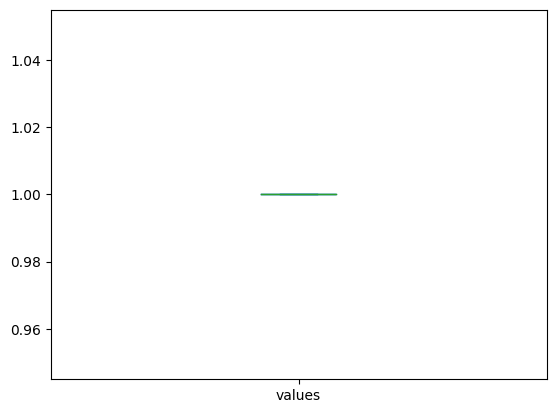

In [103]:

_, bp = df['values'].plot.box(return_type='both')


In [105]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]

In [106]:
outliers

array([], dtype=int64)

In [119]:
list((df[df['values'] > 0.5]['values']) | (True))

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [112]:
df.quantile(0.25)['values']


C:\Temp\ipykernel_2084\3380457948.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.25)['values']


1.0

In [113]:
df.quantile(0.75)['values']

C:\Temp\ipykernel_2084\422529731.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)['values']


1.0

In [123]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import pingouin as pg
import scipy.stats as scs
from scipy.stats import shapiro
from scipy.stats import norm
import matplotlib as plt

In [124]:
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=2000,  # количество бутстрап-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in range(boot_it):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1),
            replace=True  # параметр возвращения
        ).values

        samples_2 = data_column_2.sample(
            len(data_column_1),
            replace=True
        ).values

        boot_data.append(statistic(samples_1)-statistic(samples_2))  # mean() - применяем статистику

    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = norm.cdf(
        x=0,
        loc=np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0,
        loc=-np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    # Визуализация
    # _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    # for bar in bars:
    #     if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
    #         bar.set_facecolor('red')
    #     else:
    #         bar.set_facecolor('grey')
    #         bar.set_edgecolor('black')
    #
    # plt.style.use('ggplot')
    # plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    # plt.xlabel('boot_data')
    # plt.ylabel('frequency')
    # plt.title("Histogram of boot_data")
    # plt.show()

    return {"boot_data": boot_data,
            "quants": quants,
            "p_value": p_value}

In [130]:
a = get_bootstrap(
    df[df['group'] == 'A']['values'],  # числовые значения первой выборки
    df[df['group'] == 'B']['values'],  # числовые значения второй выборки
    boot_it=2000,  # количество бутстрап-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
)

In [131]:
a['p_value']

1.4091187774464602e-12

In [128]:
df

,group,values
0,A,1
1,B,1
2,A,1
3,B,1
4,A,1
...,...,...
95,B,1
96,A,1
97,B,1
98,A,1
